In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import minimize

In [21]:
datos1 = pd.read_csv("oscilador_torsional_datos1.csv",sep=';')
datos2 = pd.read_csv("oscilador_torsional_datos2.csv",sep=';')

t1 = datos1['Tiempo1'][71:2300:1]
v1 = datos1['Voltaje1'][71:2300:1]

t2 = datos1['Tiempo2'][0:2100:1]
v2 = datos1['Voltaje2'][0:2100:1]

t3 = datos1['Tiempo3'][0:2100:1]
v3 = datos1['Voltaje3'][0:2100:1]

t4 = datos2['Tiempo4'][71:2300:1]
v4 = datos2['Voltaje4'][71:2300:1]

t5 = datos2['Tiempo5'][100:2100:1]
v5 = datos2['Voltaje5'][100:2100:1]

t6 = datos2['Tiempo6'][0:2100:1]
v6 = datos2['Voltaje6'][0:2100:1]

print(datos2)

           Unnamed: 0 Unnamed: 1 Unnamed: 2  Tiempo4  Voltaje4  Unnamed: 5  \
0                 NaN        NaN        NaN      NaN       NaN         NaN   
1       Record Length       2500     Points    0.000     -2.42         NaN   
2     Sample Interval      0.004          s    0.004     -2.42         NaN   
3       Trigger Point          0    Samples    0.008     -2.42         NaN   
4                 NaN        NaN        NaN    0.012     -2.42         NaN   
...               ...        ...        ...      ...       ...         ...   
2498              NaN        NaN        NaN    9.988     -2.42         NaN   
2499              NaN        NaN        NaN    9.992     -2.42         NaN   
2500              NaN        NaN        NaN    9.996     -2.42         NaN   
2501              NaN        NaN        NaN      NaN       NaN         NaN   
2502              NaN        NaN        NaN      NaN       NaN         NaN   

      Unnamed: 6  Unnamed: 7  Unnamed: 8  Unnamed: 9  ...  Unna

In [28]:
def expo(t, parametros):
    a,b,c = parametros
    d = v1[71]
    return d*np.exp(-a * (t+0.25)/2)*np.cos(b*(t+0.25)+c)

def perdida(parametros, t,experimental):
    prediccion = expo(t,parametros)
    return np.mean((prediccion - experimental)**2)

prediccion_i = [0, 0, 0]
result = minimize(perdida, prediccion_i, args=(t1, v1),method='Nelder-Mead')

best_params = result.x
W1 = best_params[1]
gamma1 = best_params[0]
print("Best Parameters:", best_params)
W01 = np.sqrt(W1**2 + (gamma1/2)**2)
Q = W01/gamma1
Q


Best Parameters: [ 0.50062749 -5.35922888  4.02297249]


10.716693469299015

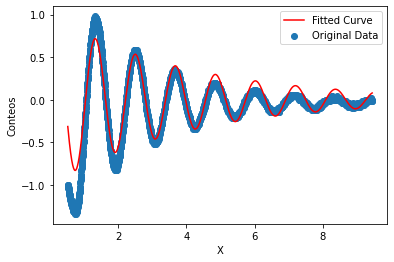

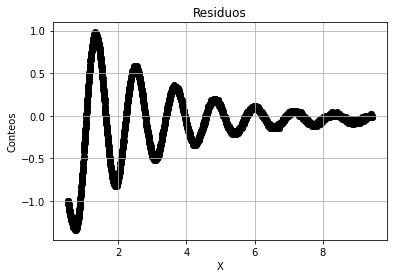

In [30]:

Y = expo(t1,best_params)

plt.scatter(t1+0.25, v1, label='Original Data')
plt.plot(t1+0.25, Y, color='red', label='Fitted Curve')
plt.xlabel('X')
plt.ylabel('Conteos')
plt.legend()
plt.show()

plt.scatter(t1+0.25, v1, label='Residuos', color='black')
plt.grid()
plt.xlabel('X')
plt.ylabel('Conteos')
plt.title('Residuos')
plt.show()

Text(0.5, 0, 'Tiempo (s)')

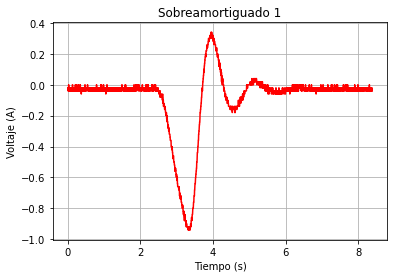

In [24]:
plt.plot(t2,v2,color='red')
plt.grid()
plt.title('Sobreamortiguado 1')
plt.ylabel('Voltaje (A)')
plt.xlabel('Tiempo (s)')

Text(0.5, 0, 'Tiempo (s)')

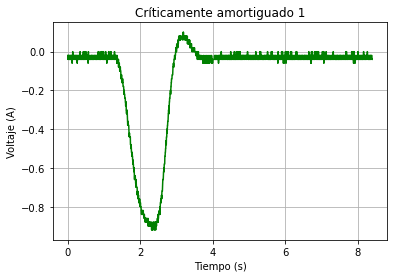

In [25]:
plt.plot(t3,v3,color='green')
plt.grid()
plt.title('Críticamente amortiguado 1')
plt.ylabel('Voltaje (A)')
plt.xlabel('Tiempo (s)')

Best Parameters: [ 0.50062749 -5.35922888  4.02297249]


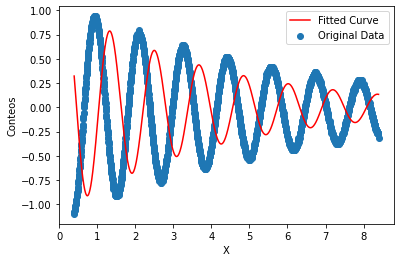

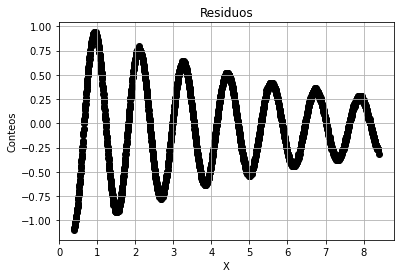

Best Parameters: [ 0.50062749 -5.35922888  4.02297249]


10.716693469299015

In [48]:
corr = 0
def expo2(t, parametros):
    a,b,c,e = parametros
    d = v5[100]
    return d*np.exp(-a * (t+corr)/2)*np.cos(b*(t+corr)+c)+e

def perdida2(parametros, t,experimental):
    prediccion = expo2(t,parametros)
    return np.mean((prediccion - experimental)**2)

prediccion_ii = [0.5, 0, 0]
result2 = minimize(perdida2, prediccion_ii, args=(t5, v5),method='Nelder-Mead')

best_params2 = result.x
print("Best Parameters:", best_params)

Y2 = expo2(t5,best_params2)

plt.scatter(t5+corr, v5, label='Original Data')
plt.plot(t5+corr, Y2, color='red', label='Fitted Curve')
plt.xlabel('X')
plt.ylabel('Conteos')
plt.legend()
plt.show()

plt.scatter(t5, v5, label='Residuos', color='black')
plt.grid()
plt.xlabel('X')
plt.ylabel('Conteos')
plt.title('Residuos')
plt.show()

W2 = best_params2[1]
gamma2 = best_params2[0]
print("Best Parameters:", best_params2)
W02 = np.sqrt(W2**2 + (gamma2/2)**2)
Q2 = W02/gamma2
Q2

Text(0.5, 0, 'Tiempo (s)')

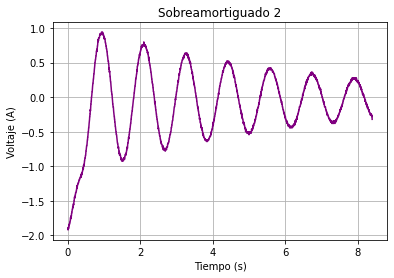

In [ ]:
plt.plot(t5,v5,color='purple')
plt.grid()
plt.title('Sobreamortiguado 2')
plt.ylabel('Voltaje (A)')
plt.xlabel('Tiempo (s)')

Text(0.5, 0, 'Tiempo (s)')

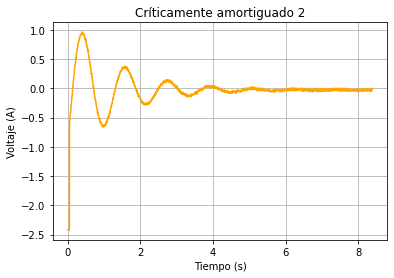

In [ ]:
plt.plot(t6,v6,color='orange')
plt.grid()
plt.title('Críticamente amortiguado 2')
plt.ylabel('Voltaje (A)')
plt.xlabel('Tiempo (s)')

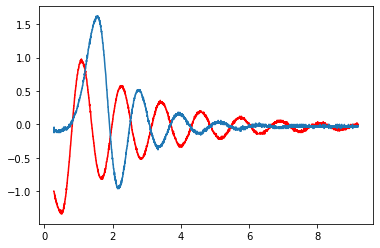

In [ ]:
plt.plot(t1,v1,color='red')
plt.plot(t4,v4)